# Challenge House Pricing

## 1. Nạp dữ liệu

#### 1.1 Import thư viện

In [588]:
import pandas as pd
import itables 
from itables import show
from IPython import display

#### 1.2 Nạp và xem dữ liệu

In [589]:
df = pd.read_csv('data/train.csv')

In [590]:
show(df)

Loading ITables v2.5.2 from the internet... (need help?)


## 2. Phân tích khám phá dữ liệu

### 1. Thống kê mô tả (Descriptive Statistics) - Ungraphic Approach

#### 1.1 Quan sát dữ liệu

In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

+ 1460 bộ, 43 kiểu object, 3 kiểu float và 35 kiểu số nguyên.
+ 81 thuộc tính.

#### 1.2 Kiểm tra null và số thuộc tính có giá trị 0 trong tập

In [592]:
n = 0
for name, sum in df.isna().sum().items():
    if sum > 0:
        print(f'{name}: {sum}')
        n += 1
print(f"\nTotal features: {n}")

LotFrontage: 259
Alley: 1369
MasVnrType: 872
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406

Total features: 19


+ Thiếu electrical

In [593]:
n = 0
for name, sum in (df == 0).sum().items():
    if sum > 0:
        print(f'{name}: {sum}')
        n += 1
print(f"\nTotal features: {n}")

MasVnrArea: 861
BsmtFinSF1: 467
BsmtFinSF2: 1293
BsmtUnfSF: 118
TotalBsmtSF: 37
2ndFlrSF: 829
LowQualFinSF: 1434
BsmtFullBath: 856
BsmtHalfBath: 1378
FullBath: 9
HalfBath: 913
BedroomAbvGr: 6
KitchenAbvGr: 1
Fireplaces: 690
GarageCars: 81
GarageArea: 81
WoodDeckSF: 761
OpenPorchSF: 656
EnclosedPorch: 1252
3SsnPorch: 1436
ScreenPorch: 1344
PoolArea: 1453
MiscVal: 1408

Total features: 23


+ **Đáng chú ý:**
    + LotFrontage vs alley
    + BsmtExposure có 38 giá trị null trong khi các giá trị liên quan như BsmtCon, BsmtQual chỉ có 37. Có thể thiếu
+ **Thiếu**
    + Masonry veneer 872 type NaN nhưng có Masonry veneer Area 861 nhà có diện tích lót tường là 0. => Có thể thiếu dữ liệu.
    + Miscellaneous có 1406 căn không có nhưng lại 1408 căn không tiêu tiền cho Miscellaneous. 
    

#### 1.3 Thông số dữ liệu

In [594]:
display.display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### 2. Deep inspecting - Quan sát sâu

#### 2.1 Basement

In [595]:
temp = df[df['BsmtUnfSF'] == 0]
temp = temp[temp['BsmtFinType2'] == 'Unf']
show(temp[['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtQual','BsmtCond','BsmtExposure','BsmtUnfSF','TotalBsmtSF',
           'GarageType','FireplaceQu','BsmtHalfBath','BsmtFullBath']])

Loading ITables v2.5.2 from the internet... (need help?)


+ **Thiếu**
    + Kiểu của basement type 2 có thể bị sai khi mà tổng diện tích hầm = diện tích đã hoàn thành + diện tích chưa hoàn thành. Nhưng diện tích type 2 chưa hoàn thành là 0 và loại hầm lại là 'Unf' nhưng tổng diện tích chưa xây lại là 0. có thể dữ liệu đây bị sai hay không đầy đủ.

In [596]:
temp = df[df['TotalBsmtSF'] != 0]
temp = temp[temp['BsmtExposure'].isna()]
show(temp[['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtQual','BsmtCond','BsmtExposure','BsmtUnfSF','TotalBsmtSF',
           'GarageType','FireplaceQu','BsmtHalfBath','BsmtFullBath']])

Loading ITables v2.5.2 from the internet... (need help?)


+ **Chú ý** Hầm chưa hoàn thiện cả type 1 nhưng lại có chất lượng và tình trạng của tầng hầm ?

In [597]:
temp = df[df['BsmtFinType2'].isna() & df['BsmtUnfSF'] != 0]
show(temp[['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtQual','BsmtCond','BsmtExposure','BsmtUnfSF','TotalBsmtSF',
           'GarageType','FireplaceQu','BsmtHalfBath','BsmtFullBath']])

Loading ITables v2.5.2 from the internet... (need help?)


In [598]:
temp = df[df['BsmtFinType2'].isna() & df['BsmtUnfSF'] == 0]
print(temp[['BsmtFinType2','BsmtFinType1']].isna().sum())

BsmtFinType2    37
BsmtFinType1    37
dtype: int64


+ Type2 thiếu dữ liệu.

#### 2.2 Masonry veneer 
+ Hay có thể gọi là lớp vật liệu bao quanh, lớp ngoài của cấu trúc chịu tải chính của căn nhà như khối xi măng hay khung thép, nó không có chứng năng chịu tải thường nhẹ và dùng để bảo vệ lớp chịu tải khỏi ảnh hưởng thiên nhiên và có khoảng trống giữa nó và cấu trúc chính. (Nhà bình thường chúng ta ở VN không xử dụng phương pháp veneer này, tường gạch là cấu trúc chịu tải chính)

In [599]:
temp = df[df['MasVnrArea'] > 0]
temp = temp[temp['MasVnrType'].isna()]
show(temp[['MasVnrType','MasVnrArea']])

Loading ITables v2.5.2 from the internet... (need help?)


+ Thiếu dữ liệu lót tường.

In [600]:
temp = df[df['MasVnrArea'] == 0]
temp = temp[temp['MasVnrType'].notnull()]
show(temp[['MasVnrType','MasVnrArea']])

Loading ITables v2.5.2 from the internet... (need help?)


+ Thiếu diện tích lót tường.

In [601]:
temp = df[df['MasVnrArea'].isna()]
show(temp[['MasVnrType','MasVnrArea']])

Loading ITables v2.5.2 from the internet... (need help?)


+ Diện tích lót là null thay vì 0. Có thể thiếu hoặc sai.

#### 2.3 Miscellaneous (một số yếu tố khác)

In [602]:
temp = df[df['MiscFeature'].isna()]
temp = temp[temp['MiscVal'] != 0]
show(temp[['MiscVal','MiscFeature']])

Loading ITables v2.5.2 from the internet... (need help?)


In [603]:
temp = df[df['MiscVal'] == 0]
temp = temp[temp['MiscFeature'].notnull()]
show(temp[['MiscVal','MiscFeature']])

Loading ITables v2.5.2 from the internet... (need help?)


+ Nghi rằng 2 dữ liệu trên thiếu giá trị.

#### 2.4 Street and Alley

In [604]:
temp = df[df['LotFrontage'].isna()]
temp = temp[temp['Alley'].isna()]
show(temp[['LotFrontage','Alley','Street','MSZoning','Neighborhood']])

Loading ITables v2.5.2 from the internet... (need help?)


#### 2.5 Kiểm tra FirePlace

In [605]:
df[(df['FireplaceQu'].isna()) & (df['Fireplaces'] == 0)].shape

(690, 81)

+ 690 bộ, không có bị lệch dữ liệu.

#### 2.6 Kiểm tra Pool

In [606]:
df[(df['PoolQC'].isna()) & (df['PoolArea'] == 0)].shape

(1453, 81)

+ 1453 bộ, không có bị lệch dữ liệu.

#### 2.7 Kiểm tra Garage

In [607]:
df[(df['GarageType'].isna()) &
   (df['GarageYrBlt'].isna()) &
   (df['GarageFinish'].isna()) &
   (df['GarageQual'].isna()) &
   (df['GarageCond'].isna())].shape

(81, 81)

+ 81 bộ, dữ liệu không bị lệch.

### 3. Data Cleaning - Dọn dẹp dữ liệu
+ Chuyển tất cá các giá trị Null gốc không có thành 'X' để dễ quản lí so với các dữ liệu còn lại và các dữ liệu không xác định thành 'U'.

#### 3.1 Basement

In [608]:
basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure']
basement_val = ['Unf','X']
df.loc[(df['BsmtFinType2'] == 'Unf') & (df['TotalBsmtSF'] == df['BsmtFinSF1']),'BsmtFinType2'] = 'X'
df.loc[df['BsmtFinType2'].isna() & (df['BsmtUnfSF'] != 0),'BsmtFinType2'] = 'Unf'
# df.loc[df['BsmtFinType2'].isna() & (df['BsmtFinType1'].isna()),'BsmtFinType2'] = 'X'
# df.loc[(df['BsmtFinType2'] == 'X') & (df['BsmtFinType1'].isna()),'BsmtFinType1'] = 'X'

for col in basement:
    for val in basement_val:
        df.loc[(df['BsmtFinType2'] == val) & (df['BsmtFinType1'] == val) & (df[col].isna()),col] = 'X'
show(df[['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtQual','BsmtCond','BsmtExposure','BsmtUnfSF','TotalBsmtSF',
           'GarageType','FireplaceQu','BsmtHalfBath','BsmtFullBath']])


Loading ITables v2.5.2 from the internet... (need help?)


In [609]:

for col in basement:
    for val in basement_val:
        df.loc[(df['BsmtFinType2'] == val) & (df['BsmtFinType1'] == val) & (df[col].isna()),col] = 'X'
show(df[['BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtQual','BsmtCond','BsmtExposure','BsmtUnfSF','TotalBsmtSF',
           'GarageType','FireplaceQu','BsmtHalfBath','BsmtFullBath']])

Loading ITables v2.5.2 from the internet... (need help?)


#### 3.2 Frontage & Alley

In [610]:
# df['Alley'] = df.groupby(['Neighborhood','MSZoning','Street'])['Alley'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))
df['Alley'] = df['Alley'].fillna('U')
df['LotFrontage'] = df.groupby(['Neighborhood','MSZoning','Street'])['LotFrontage'].transform(lambda x: x.fillna(0))


In [611]:
show(df[['LotFrontage','Alley','Street','MSZoning','Neighborhood']])

Loading ITables v2.5.2 from the internet... (need help?)


#### 3.3 Masonry veneer

In [612]:
df.loc[(df['MasVnrArea'] > 0) & df['MasVnrType'].isna(),'MasVnrType'] = 'U'
df['MasVnrArea'].fillna(0, inplace=True)
df['MasVnrType'].fillna('X', inplace=True)

C:\Users\trand\AppData\Local\Temp\ipykernel_21772\3922211126.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrArea'].fillna(0, inplace=True)
C:\Users\trand\AppData\Local\Temp\ipykernel_21772\3922211126.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [613]:
show(df[['MasVnrType','MasVnrArea']])

Loading ITables v2.5.2 from the internet... (need help?)


#### 3.4 Electrical

In [614]:
df['Electrical'].fillna('U', inplace=True)

C:\Users\trand\AppData\Local\Temp\ipykernel_21772\2198525093.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna('U', inplace=True)


#### 3.5 xét tất cả các thuộc tính mà dữ liệu là không có hay 'None' là không có về 'X' 

In [615]:
df['GarageYrBlt'].fillna(0, inplace=True)
df.fillna('X',inplace=True)

C:\Users\trand\AppData\Local\Temp\ipykernel_21772\2716838951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageYrBlt'].fillna(0, inplace=True)


#### 3.6 Loại bỏ ID

In [616]:
df = df.drop(columns=['Id'])

### 4. Hiển thị dữ liệu (Visualize Data) - Graphic Approach

#### 4.1 Phân tích đơn biến với giá trị số

##### Kiểm tra phân bố với biểu đồ cột (histogram)

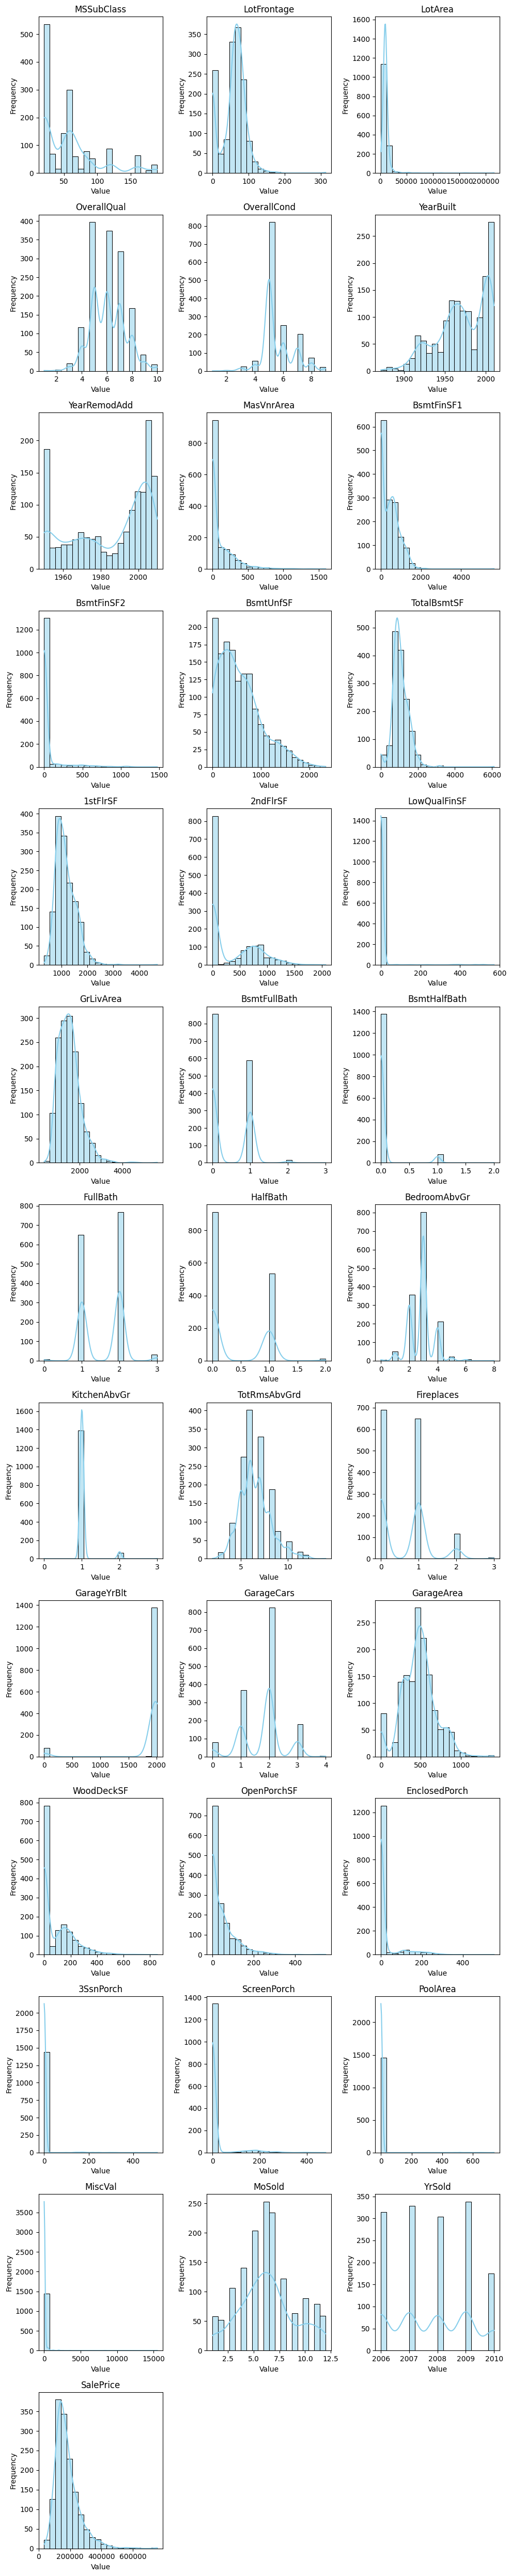

In [617]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_df = df.select_dtypes(include=['number'])
fig , axes = plt.subplots(13, 3, figsize=(10,50))
axes = axes.flatten()
for ax, col in zip(axes, numerical_df.columns):
    sns.histplot(df[col], bins=20, kde=True, color='skyblue', edgecolor='black', ax=ax)
    # ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
for ax in axes[len(numerical_df.columns):]:
    ax.set_visible(False)
    
plt.tight_layout()
plt.savefig("graphs/fig_hist_numerical_columns.png")
plt.show()

**Nhận xét**
+ Dữ liệu rời rạc:  
    + MSSubClass, BsmtFullBath, BsmtHalfBath, 
    FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, 
    TotRmsAbvGrd, Fireplaces, GarageCars.
+ Dữ liệu liên tục: 
    + LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, 
    BsmtUnfSF, TotalBsmtSF, 1stFlrSF,2ndFlrSF, LowQualFinSF, 
    GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 
    3SsnPorch, ScreenPorch, PoolArea, MiscVal.
- Phân loại thời gian: 
    + YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold.
- Phân loại đánh giá: 
    + OverallQual, OverallCond.

##### Kiểm tra ngoại lệ với boxplot

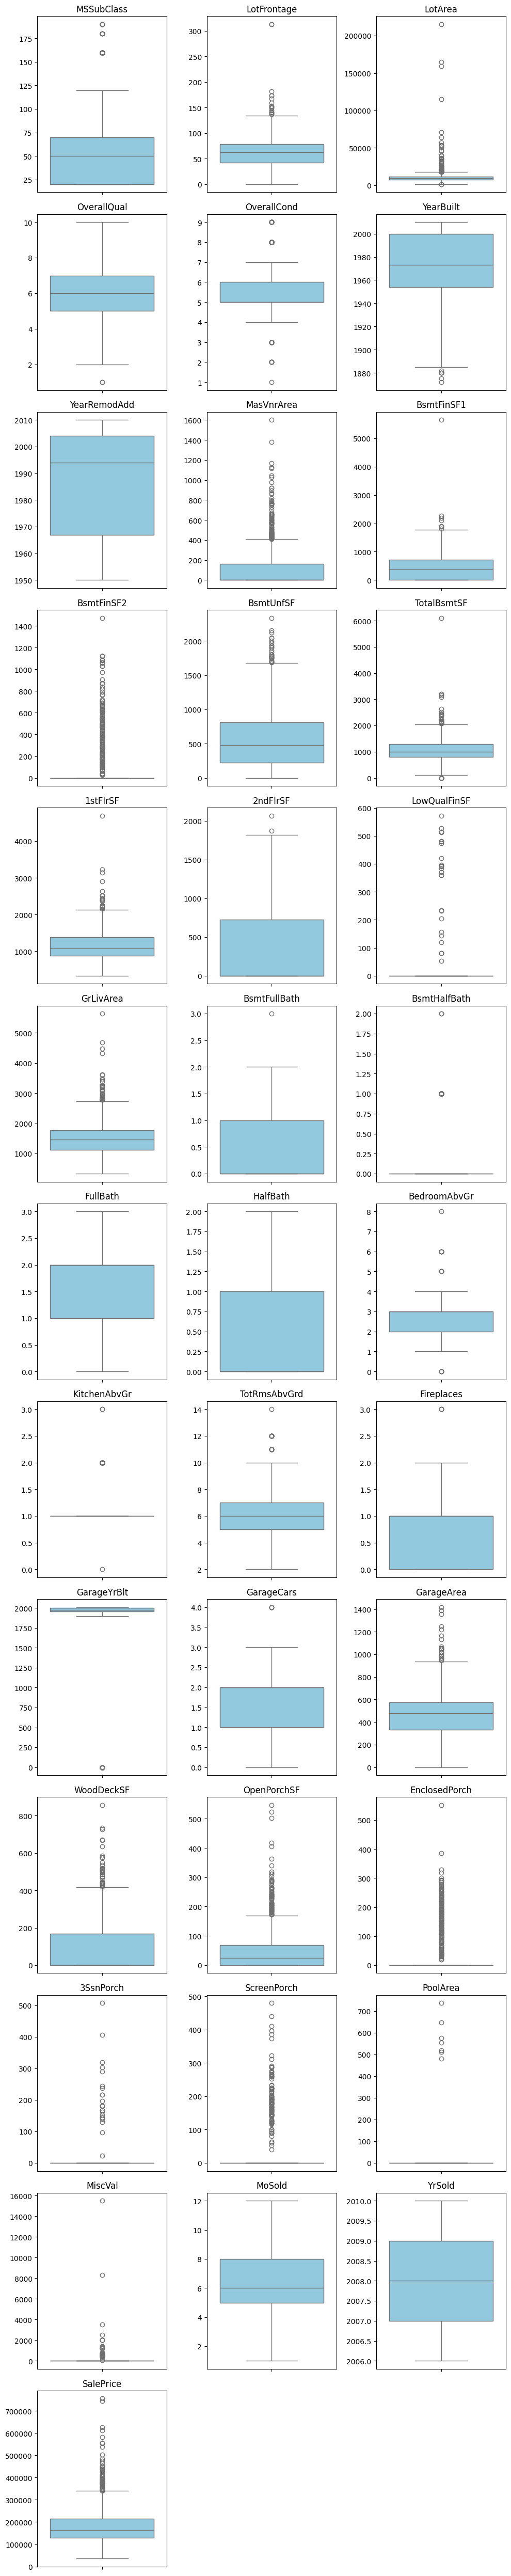

In [618]:
fig , axes = plt.subplots(13, 3, figsize=(10,50))
axes = axes.flatten()
for ax, col in zip(axes, numerical_df.columns):
    sns.boxplot(df[col], color='skyblue', ax=ax)
    # ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
for ax in axes[len(numerical_df.columns):]:
    ax.set_visible(False)
    
plt.tight_layout()
plt.savefig("graphs/fig_boxplt_numerical_columns.png")
plt.show()

**Nhật xét** 
+ Đa số các dữ liệu rời rạc có phân bố khá ổn định.
+ Đối với các dữ liệu liên tục thì có rất nhiều ngoại lệ và độ phân bố lệch về bên trái. Do một phân ảnh hưởng từ các dữ liệu thiếu sót
mà ta đã phát hiện ra khi thực hiện quan sát sâu dữ liệu ở phần 2.
+ Tuy các giá trị 0 là hợp lệ ở nhiều dữ liệu liên tục này nhưng ta cần xem xét kỹ lưỡng hơn trong quá trình tiền xử lý dữ liệu sau này
và giả sử rằng chúng còn thiếu sót. Nhất là các biểu đồ hist có phân bố L-shape.


#### 4.2 Dữ liệu phân loại - Catagorical Data

+ Chúng ta sẽ thưc hiện phân tách nhóm để hiển thị và hiểu rõ hơn về các đặc trưng phân loại này.
    1. Thông tin nơi ở:
        + MSZoning, Street, Alley, LotShape, LotConfig, LanContour, Utilities, LandSlope, Neighborhood,
        Condition1, Condition2.
    2. Tình trạng nhà ở:
        + General info: BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation.
        + Living condition: Functional, CentralAir, Heating, HeatingQC, KitchenQual, Electrical.
        + Basement: (BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2).
        + Garage: (GarageType, GarageFinish, GarageQual, GarageCond) , PavedDrive.
        + Other: PoolQC, MiscFeature, Fence, FireplaceQu.
    4. Khác:
        + SaleType, SaleCondition.

##### 1. Thông tin nơi ở

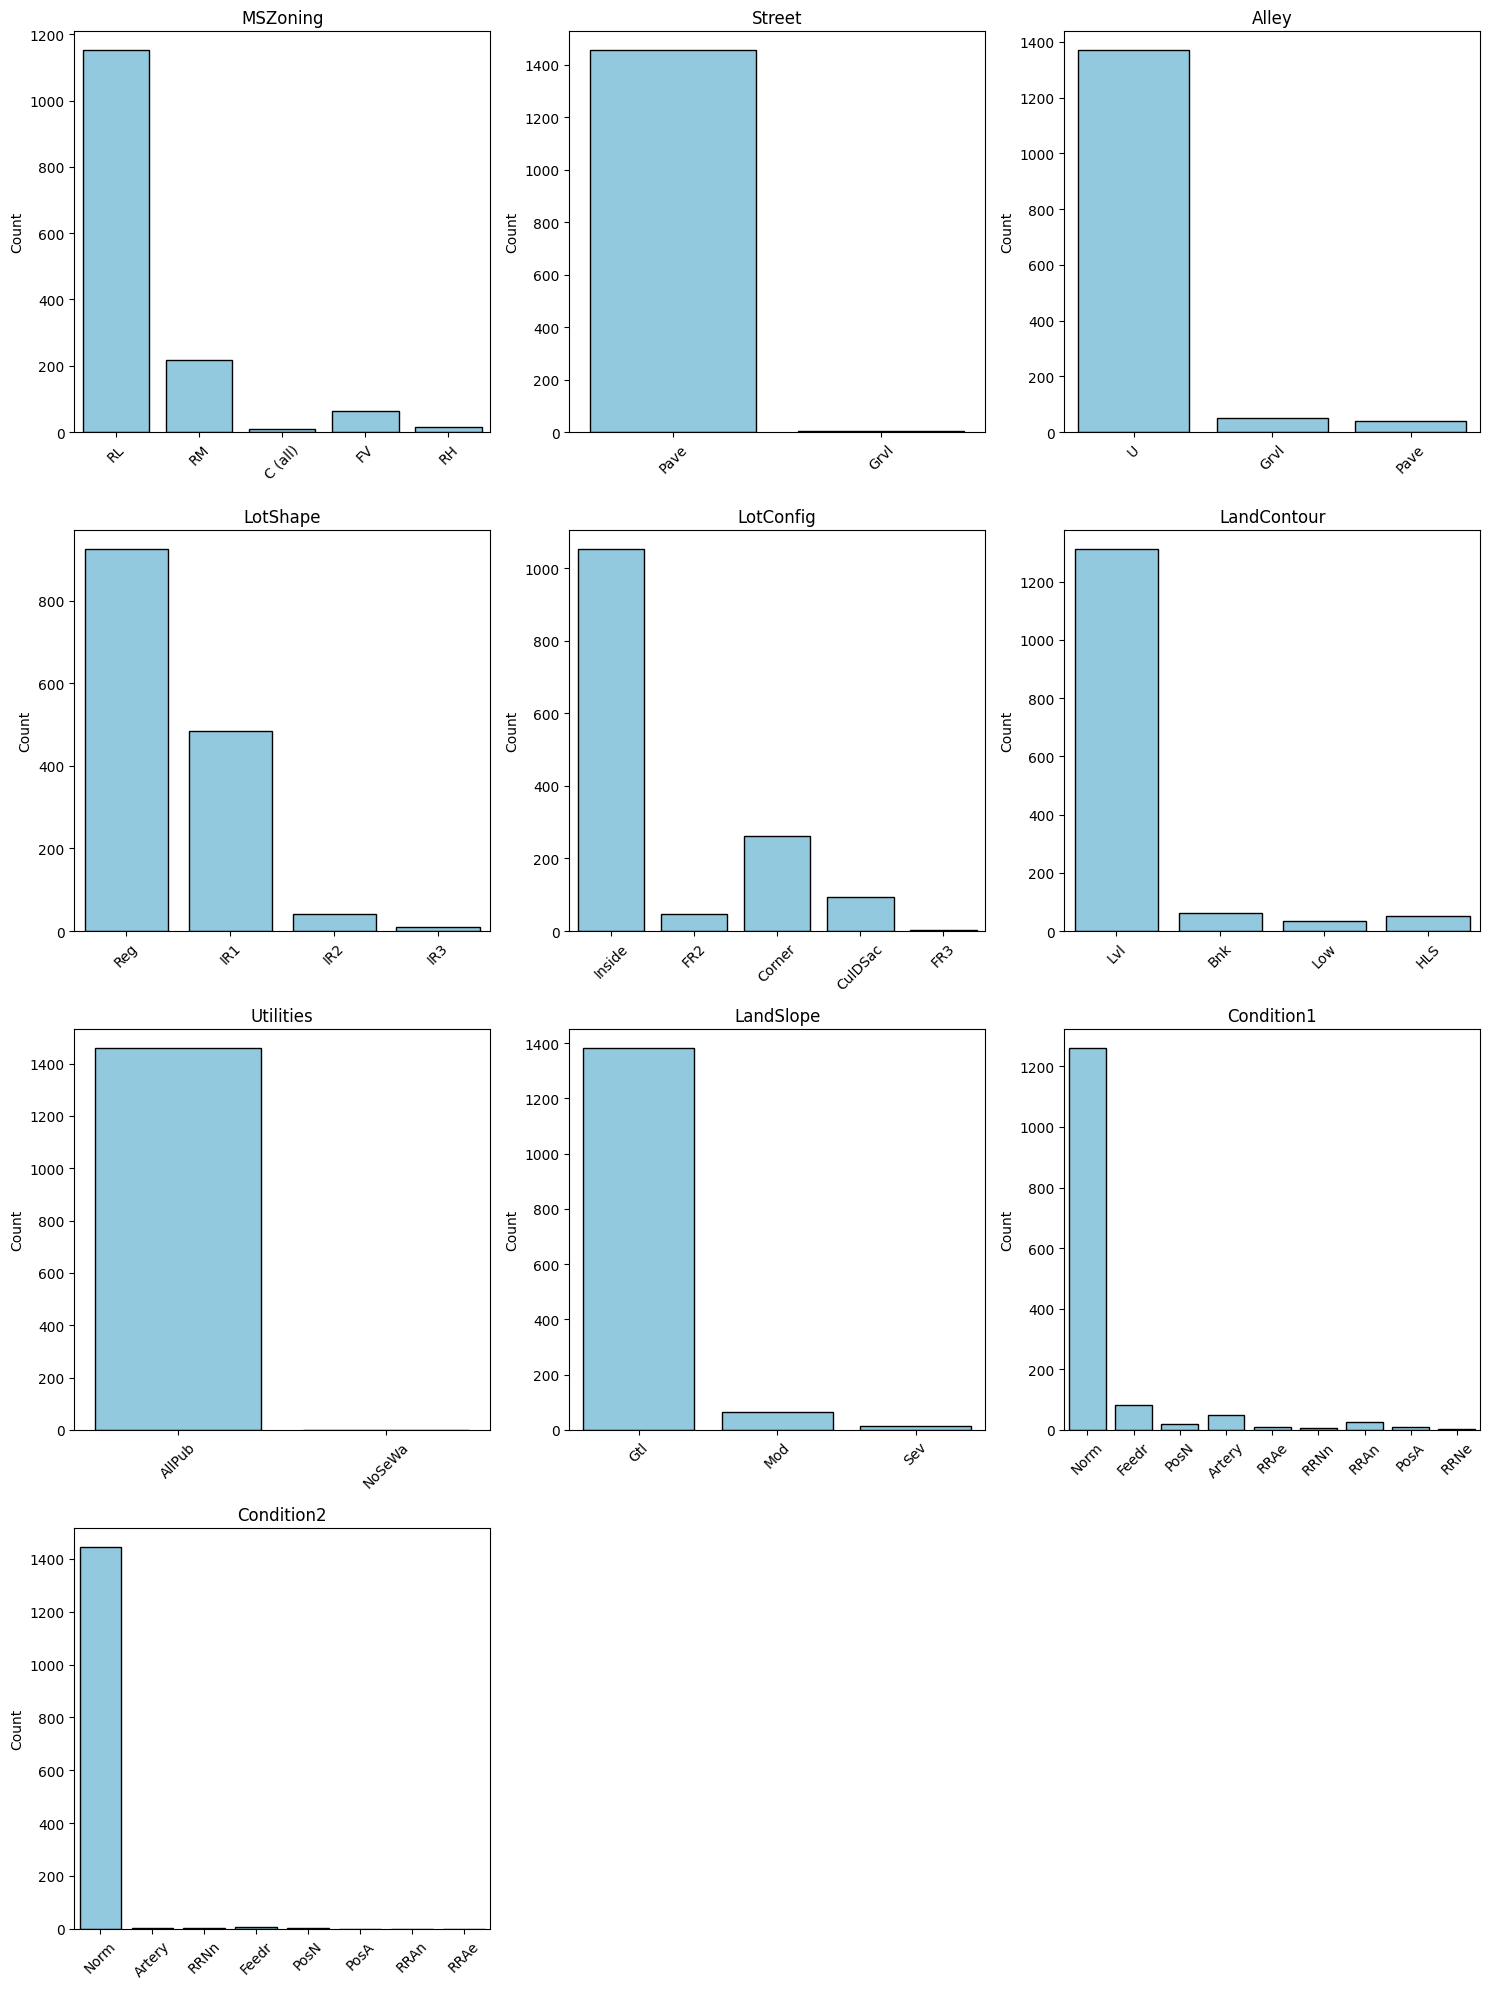

In [619]:
s = "MSZoning, Street, Alley, LotShape, LotConfig, LandContour, Utilities, LandSlope, Condition1, Condition2"
cols_name = s.split(", ")

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

for ax, col in zip(axes, cols_name):
    sns.countplot(x=df[col], color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)  # rotate category labels for readability

# Hide extra axes if there are fewer than 12 columns
for ax in axes[len(cols_name):]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig("graphs/fig_bar_categorical_type1_columns.png", dpi=300, bbox_inches='tight')
plt.show()


**Nhận xét** 
+ Các dữ liệu phân bố chênh lệch rất lơn đa phần tập trung vào 1 danh mục nhất định.
+ Đáng chú ý bên trong thì chỉ có Alley Có rất nhiều dữ liệu mục 'U' hay Unknown, vì giả thuyết rằng khả năng cao nó là mix giữa không có và thiếu dữ liệu.

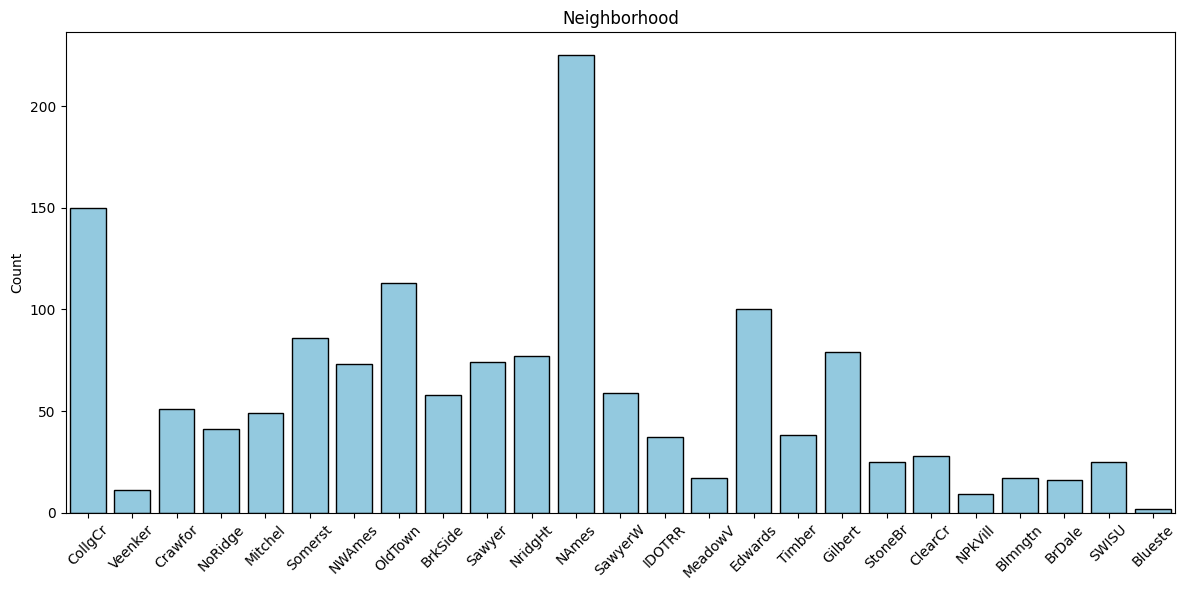

In [620]:
plt.figure(figsize=(12, 6))  # set figure size before plotting

ax = sns.countplot(x=df['Neighborhood'], color='skyblue', edgecolor='black')
ax.set_title('Neighborhood')
ax.set_xlabel('')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)  # rotate category labels for readability

plt.tight_layout()
plt.savefig("graphs/fig_bar_neighborhood.png", dpi=300, bbox_inches='tight')
plt.show()

**Nhật xét**
+ Chỉ số neighborhood có sự phân bố đồng đều hơn so với các chỉ số phân loại khác và có thể dùng làm đặc trưng chính để góm nhóm phân loại các dữ liệu thiếu.

##### 2. Tình trạng nhà ở

###### 1. **HouseInfo**

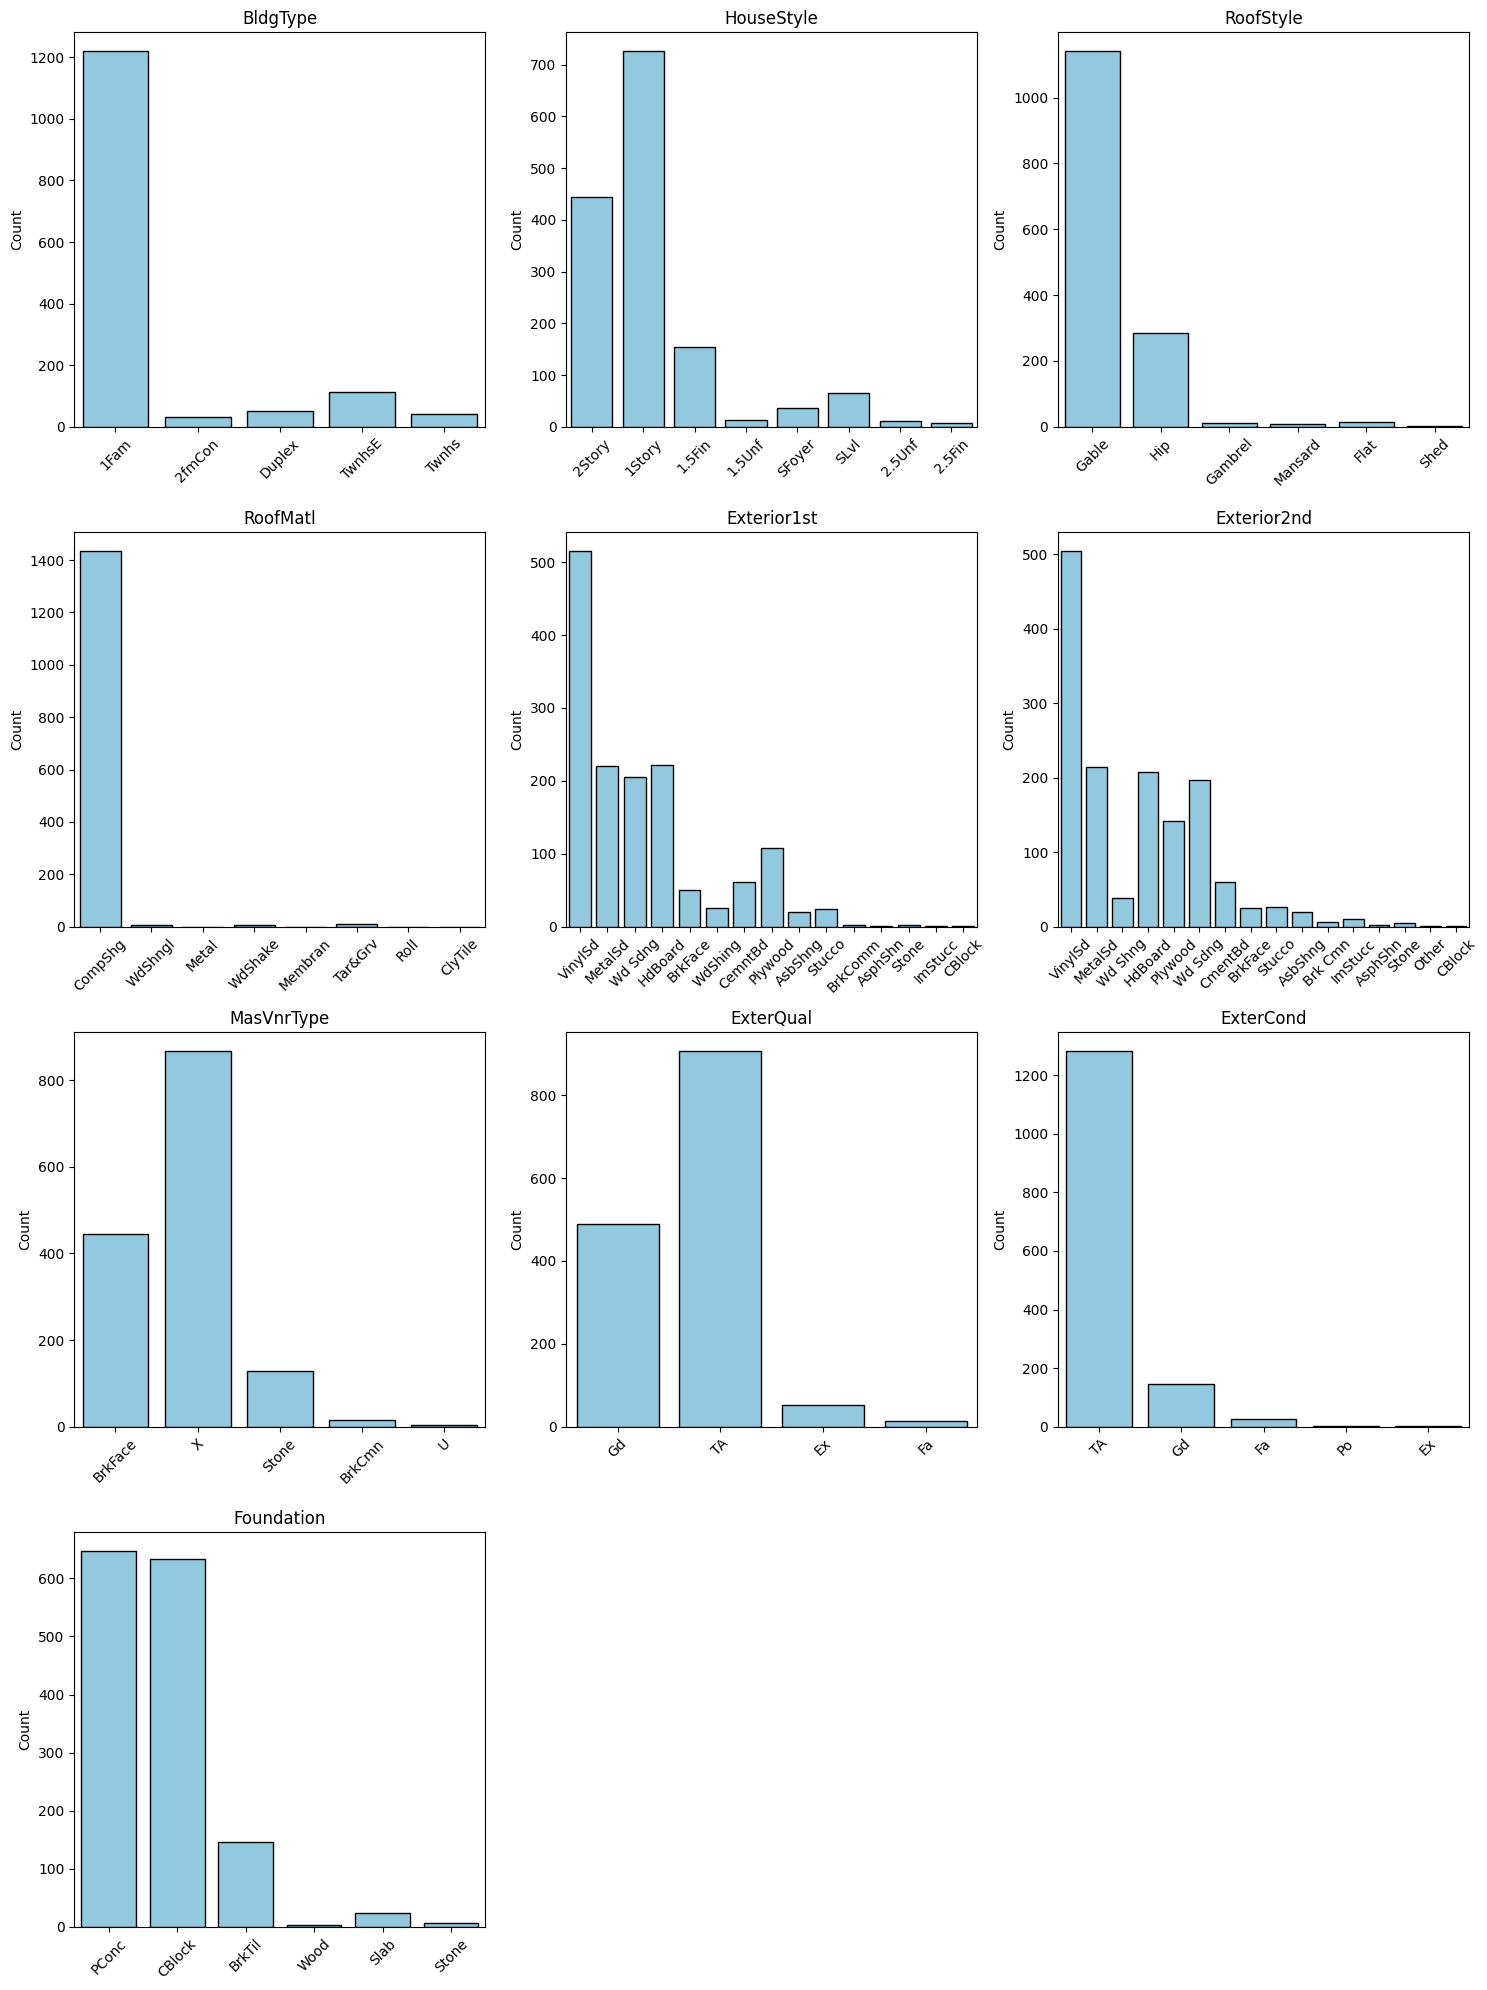

In [621]:
s = "BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation"
cols_name = s.split(", ")

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

for ax, col in zip(axes, cols_name):
    sns.countplot(x=df[col], color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)  # rotate category labels for readability

# Hide extra axes if there are fewer than 12 columns
for ax in axes[len(cols_name):]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig("graphs/fig_bar_categorical_type2_HouseInfo_columns.png", dpi=300, bbox_inches='tight')
plt.show()

**Nhận xét**
- BldgType: Chủ yếu là nhà đơn (“1Fam”).  
- HouseStyle: Nhiều nhất là nhà 1 tầng và 2 tầng.  
- RoofStyle: Mái “Gable” phổ biến nhất.  
- RoofMatl: Chủ yếu dùng “CompShg”.  
- Exterior1st / Exterior2nd: Phổ biến là “VinylSd”, “HdBoard”, “MetalSd”.  
- MasVnrType: Thường là không có 'X' với có dữ liệu thiếu 'U'.  
- ExterQual: Đa số “TA” (trung bình) và “Gd” (tốt).  
- ExterCond: Gần như tất cả “TA” – tình trạng bình thường.  
- Foundation: Chủ yếu “PConc” và “CBlock”.  

###### 2. **Living Condition**

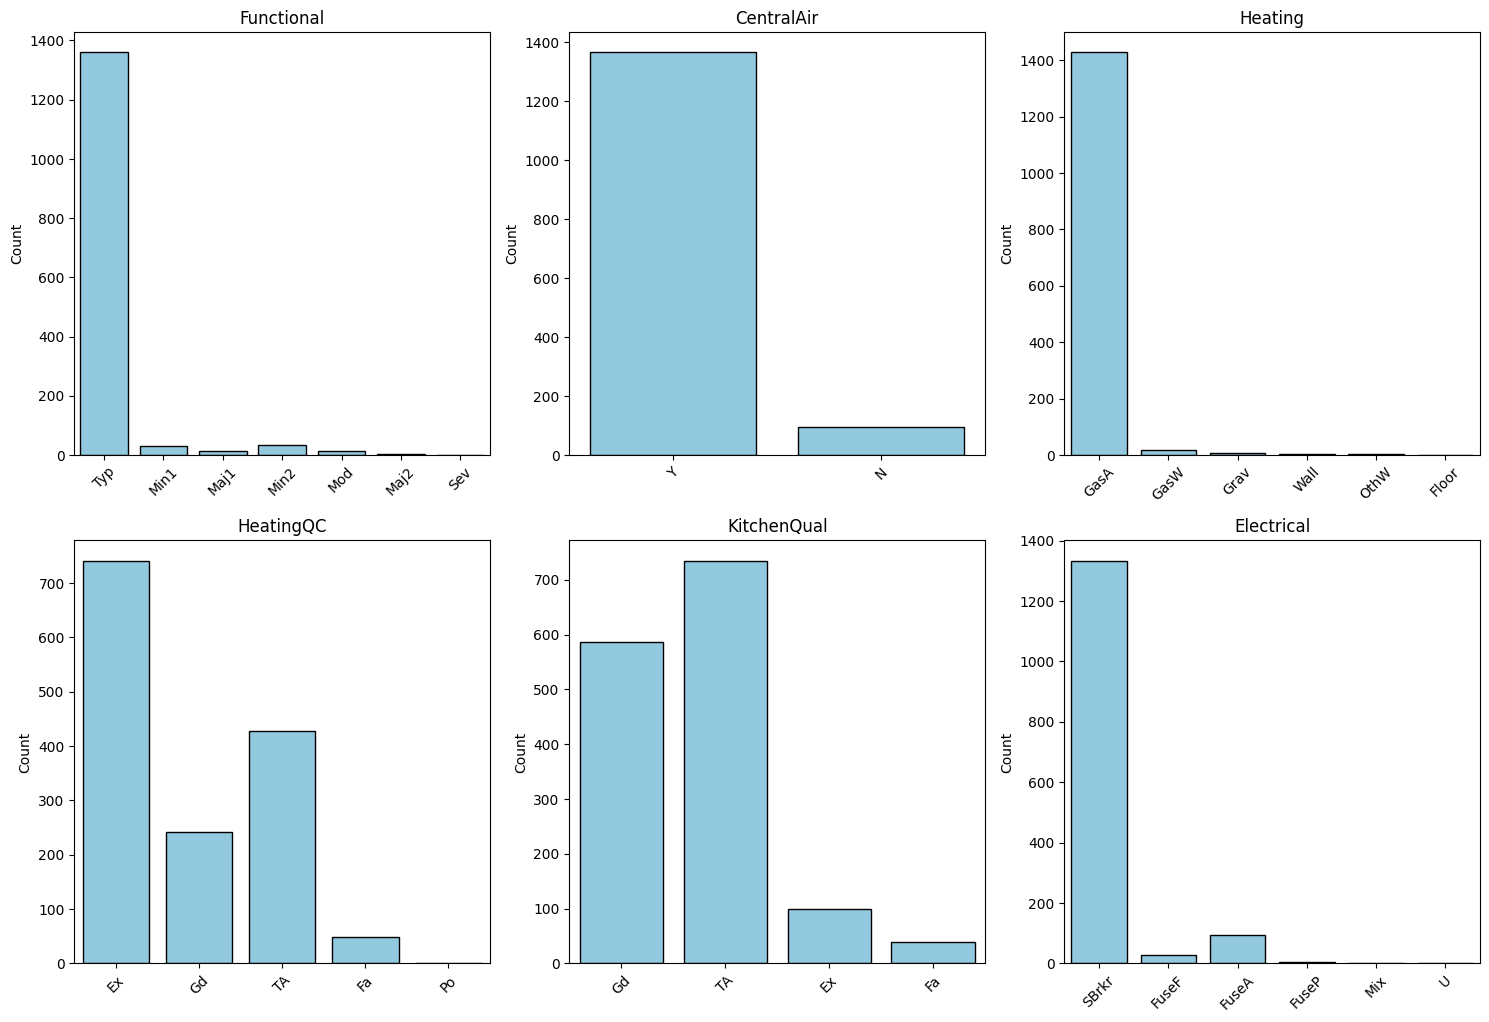

In [622]:
s = "Functional, CentralAir, Heating, HeatingQC, KitchenQual, Electrical"
cols_name = s.split(", ")

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

for ax, col in zip(axes, cols_name):
    sns.countplot(x=df[col], color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)  # rotate category labels for readability

# Hide extra axes if there are fewer than 12 columns
for ax in axes[len(cols_name):]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig("graphs/fig_bar_categorical_type2_LivingCon_columns.png", dpi=300, bbox_inches='tight')
plt.show()

**Nhận xét:**
- Functional: Phần lớn nhà ở tình trạng sử dụng bình thường (“Typ”).  
- CentralAir: Hầu hết đều có máy lạnh trung tâm (“Y”).  
- Heating: Chủ yếu dùng hệ thống sưởi bằng gas (“GasA”).  
- HeatingQC: Đa số có chất lượng sưởi tốt đến xuất sắc (“Ex”, “Gd”).  
- KitchenQual: Phổ biến là “TA” (trung bình) và “Gd” (tốt).  
- Electrical: Gần như tất cả sử dụng hệ thống “SBrkr” (ngắt mạch tự động). Với 1 giá trị thiếu.

###### 3. **Basement**

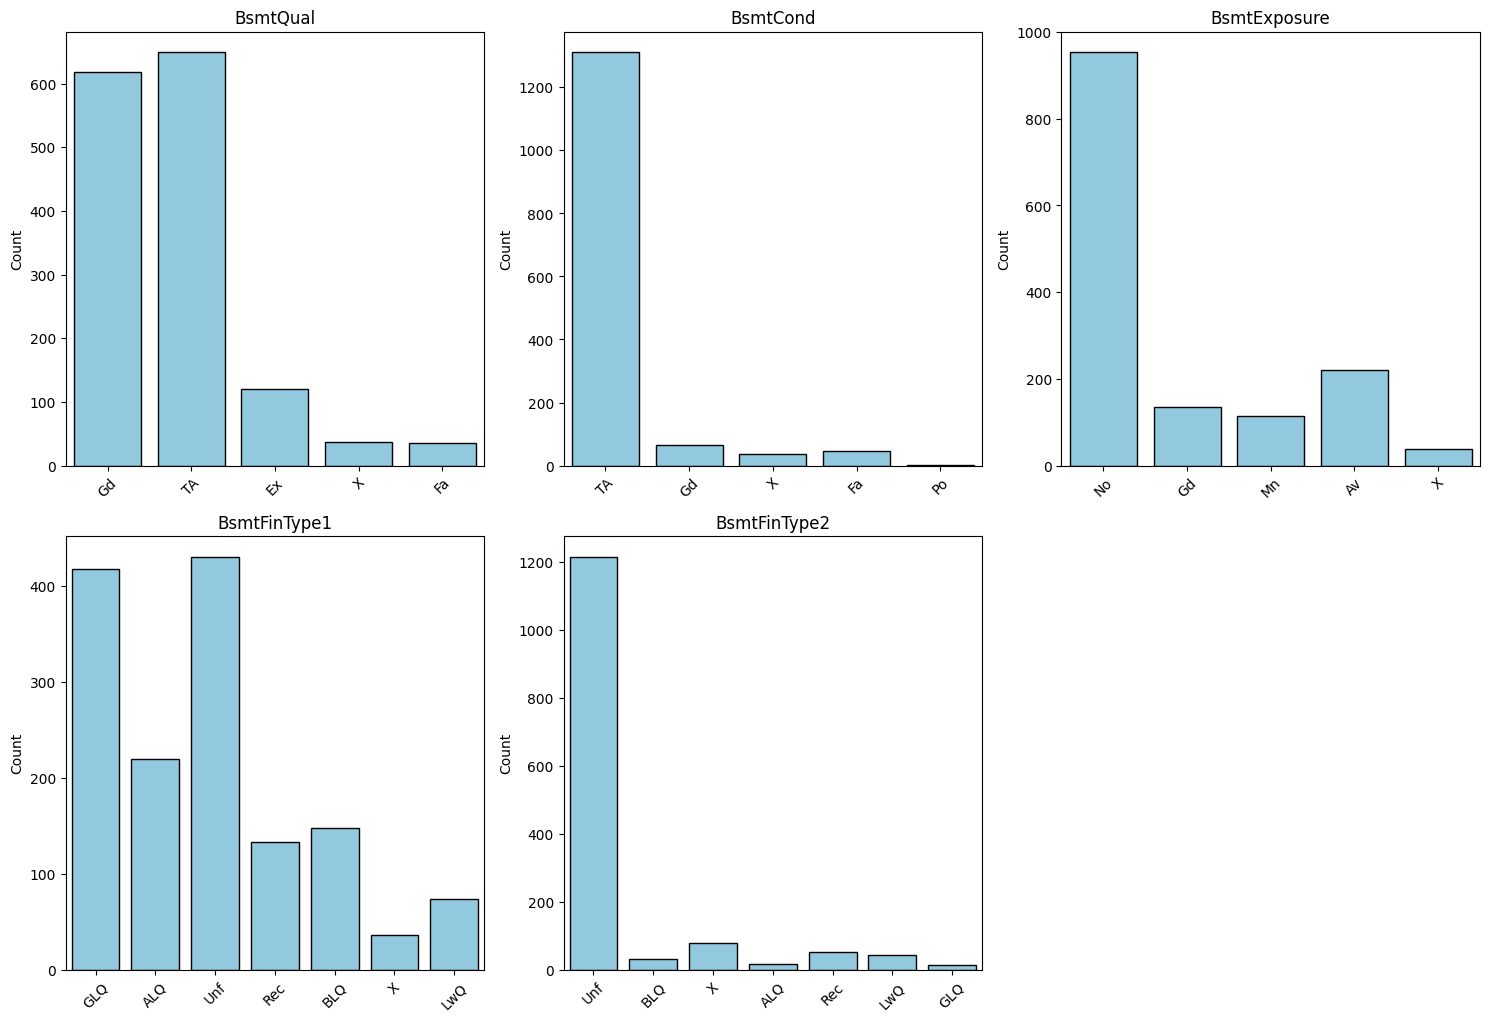

In [623]:
s = "BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2"
cols_name = s.split(", ")

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

for ax, col in zip(axes, cols_name):
    sns.countplot(x=df[col], color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)  # rotate category labels for readability

# Hide extra axes if there are fewer than 12 columns
for ax in axes[len(cols_name):]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig("graphs/fig_bar_categorical_type2_Basement_columns.png", dpi=300, bbox_inches='tight')
plt.show()

**Nhận xét**
- BsmtQual: Chủ yếu “Gd” và “TA”, cho thấy tầng hầm có chất lượng tốt hoặc trung bình.  
- BsmtCond: Hầu hết ở mức “TA” – tình trạng bình thường.  
- BsmtExposure: Phần lớn không có cửa sổ hướng ra ngoài (“No”), ít nhà có ánh sáng hoặc lối ra (“Gd”, “Av”).  
- BsmtFinType1: Phổ biến là “ALQ”, “GLQ” và “Unf” – tức tầng hầm hoàn thiện một phần hoặc chưa hoàn thiện.  
- BsmtFinType2: Chủ yếu “Unf” – phần tầng hầm phụ chưa hoàn thiện.  

###### 4. **Garage**

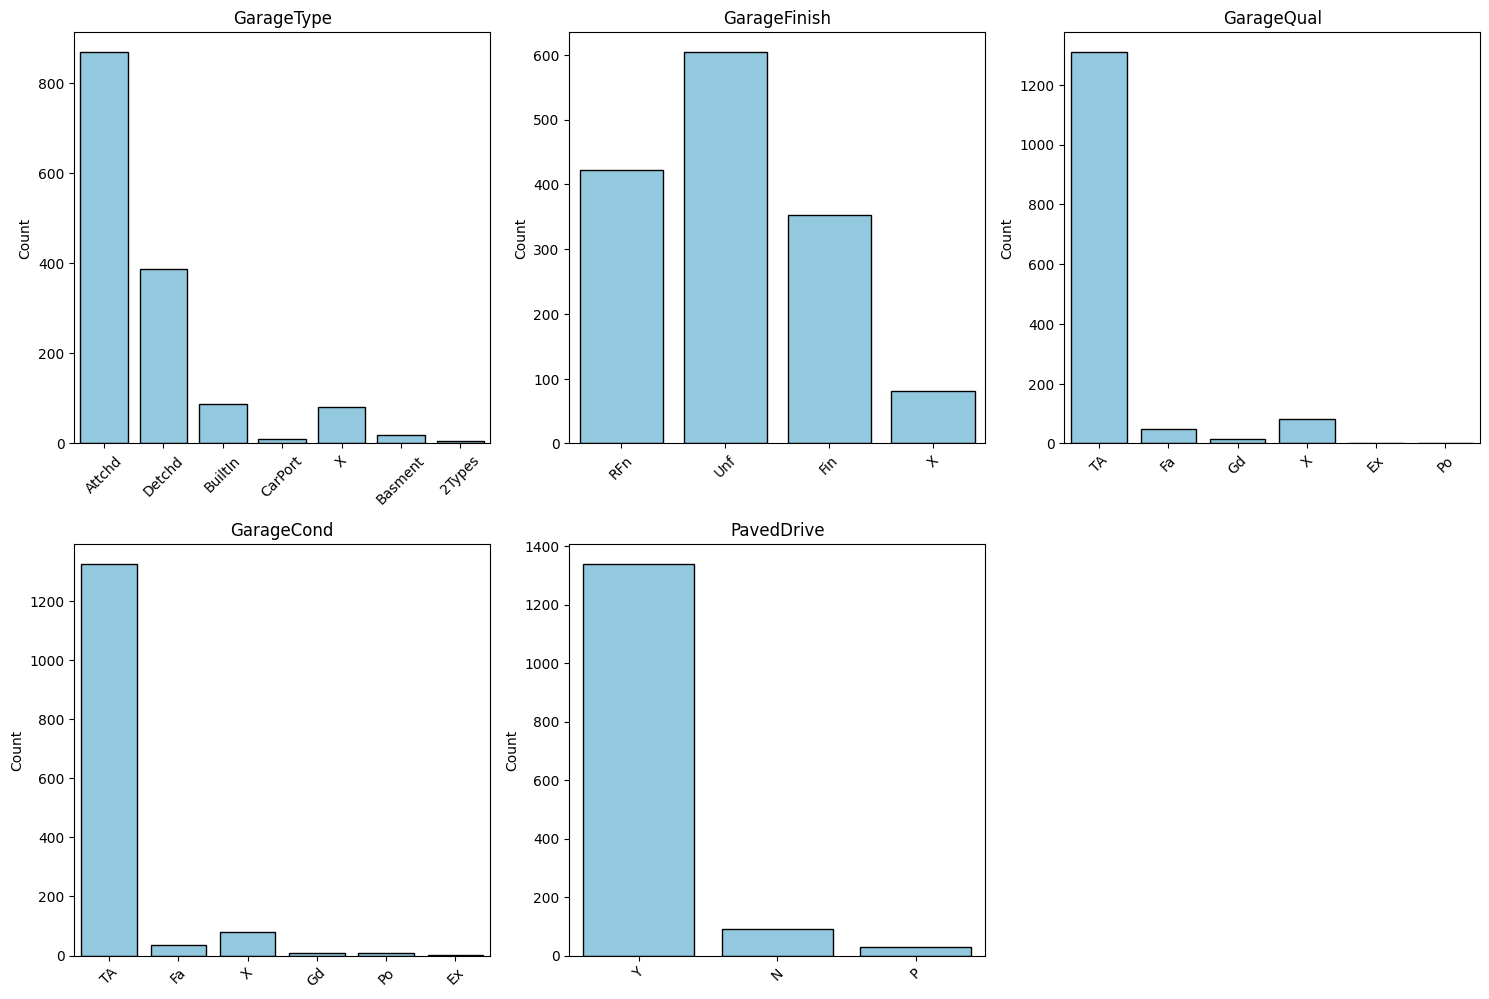

In [624]:
s = "GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive"
cols_name = s.split(", ")

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

for ax, col in zip(axes, cols_name):
    sns.countplot(x=df[col], color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)  # rotate category labels for readability

# Hide extra axes if there are fewer than 12 columns
for ax in axes[len(cols_name):]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig("graphs/fig_bar_categorical_type2_Garage_columns.png", dpi=300, bbox_inches='tight')
plt.show()

**Nhận xét**
- GarageType: Phổ biến nhất là garage gắn liền nhà (“Attchd”), sau đó là tách rời (“Detchd”).  
- GarageFinish: Đa số chưa hoàn thiện (“Unf”), một phần hoàn thiện (“RFn”) cũng khá phổ biến.  
- GarageQual: Chủ yếu “TA” – chất lượng trung bình.  
- GarageCond: Cũng phần lớn “TA” – tình trạng bình thường.  
- PavedDrive: Hầu hết có lối lái xe được lát (“Y”).  

###### 5. **Other**

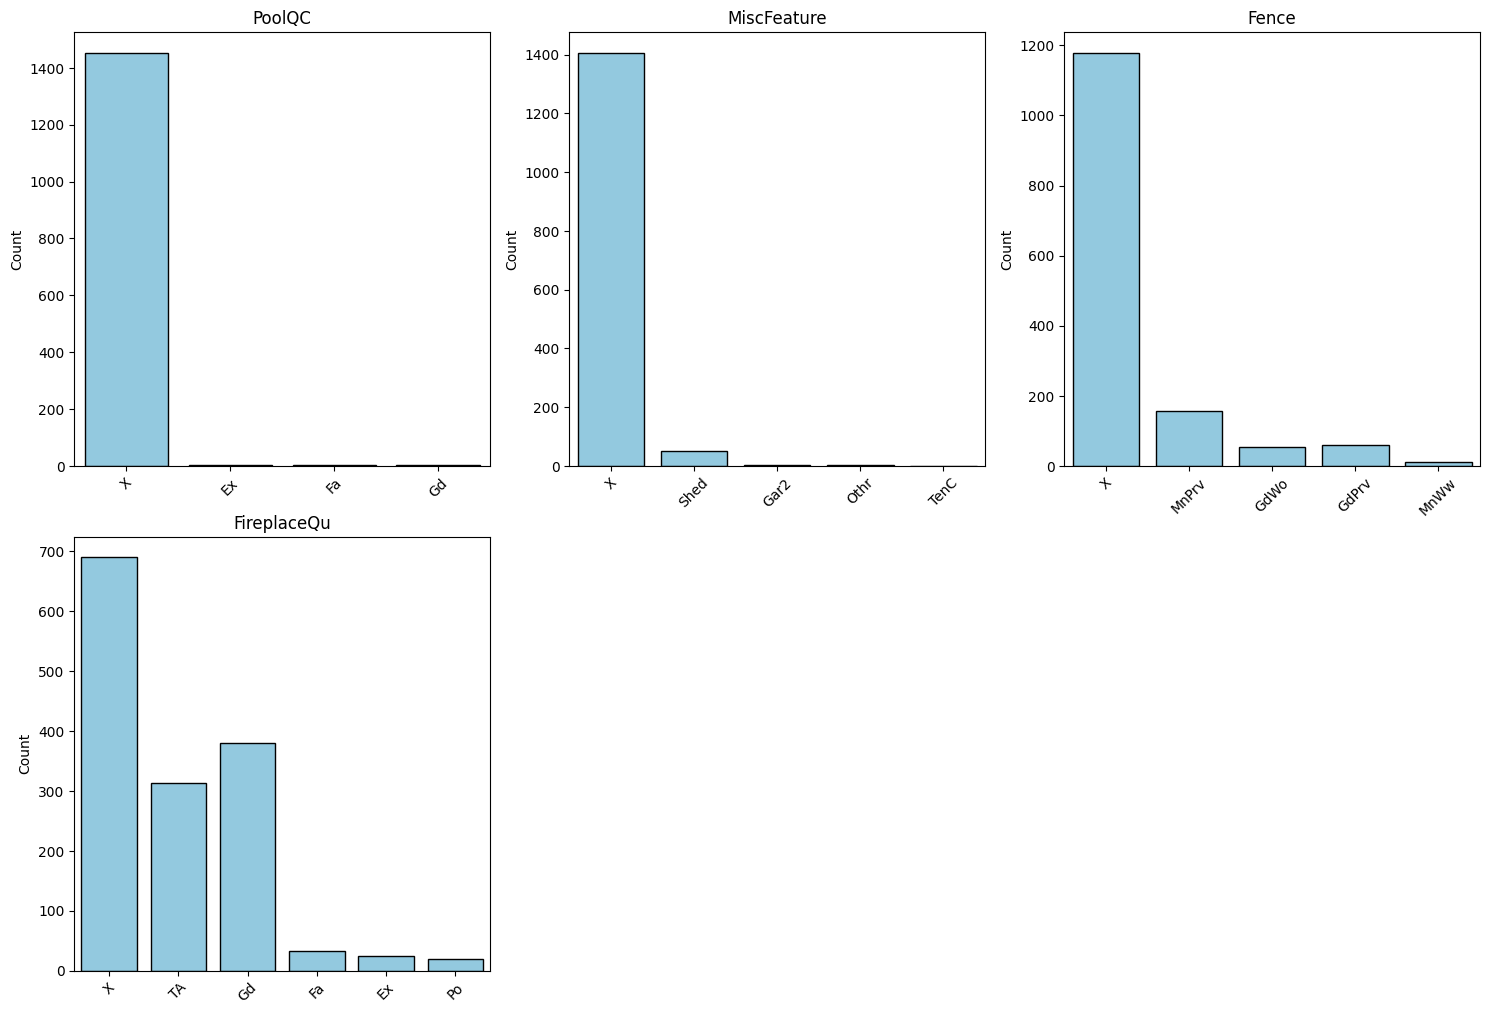

In [625]:
s = "PoolQC, MiscFeature, Fence, FireplaceQu"
cols_name = s.split(", ")

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

for ax, col in zip(axes, cols_name):
    sns.countplot(x=df[col], color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)  # rotate category labels for readability

# Hide extra axes if there are fewer than 12 columns
for ax in axes[len(cols_name):]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig("graphs/fig_bar_categorical_type2_Others_columns.png", dpi=300, bbox_inches='tight')
plt.show()

**Nhận xét**
- PoolQC: Hầu hết không có hồ bơi (“X”), rất ít nhà có hồ bơi và chất lượng tốt (“Ex”, “Gd”).  
- MiscFeature: Phần lớn không có tiện ích đặc biệt; chỉ một số ít có “Shed” (nhà kho nhỏ).  
- Fence: Đa số không có hàng rào; khi có thì chủ yếu là “MnPrv” (riêng tư mức trung bình).  
- FireplaceQu: Nhiều nhà không có lò sưởi (“X”); trong số có thì đa phần chất lượng “TA” và “Gd”.  


##### 3. Thông tin khác:

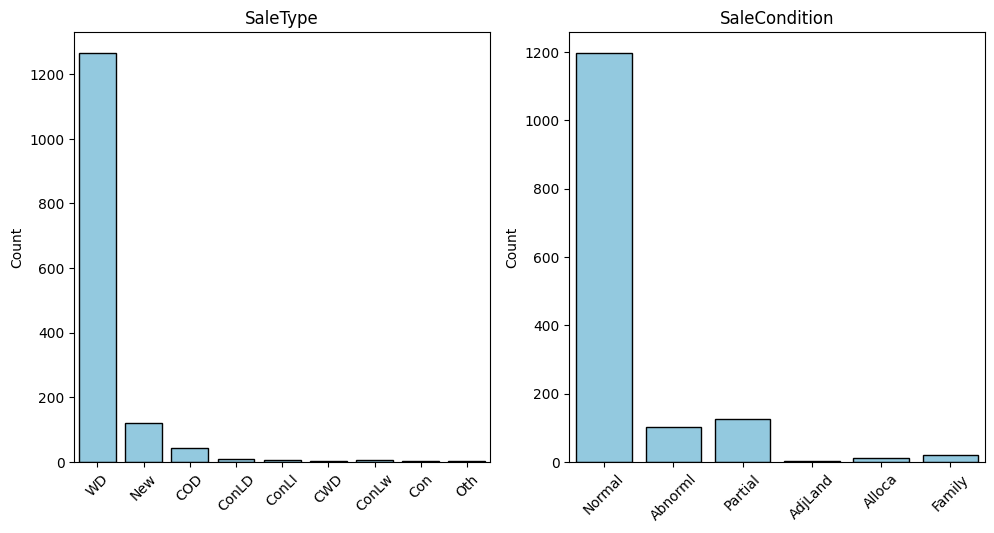

In [626]:
s = "SaleType, SaleCondition"
cols_name = s.split(", ")

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

for ax, col in zip(axes, cols_name):
    sns.countplot(x=df[col], color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)  # rotate category labels for readability

# Hide extra axes if there are fewer than 12 columns
for ax in axes[len(cols_name):]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig("graphs/fig_bar_categorical_type3_columns.png", dpi=300, bbox_inches='tight')
plt.show()

**Nhận xét**
- SaleType: Phần lớn giao dịch là dạng “WD” (chuyển nhượng thông thường). Một số ít là “New” (nhà mới) hoặc “COD” (bán do thiệt hại / đặc biệt).  
- SaleCondition: Hầu hết là “Normal” (giao dịch bình thường), một số ít “Partial” (một phần, thường là nhà mới xây), còn lại rất hiếm.  


#### 4.3 Độ tương quang - Correlations

##### 1. Dữ liêu số - Numerical Datas

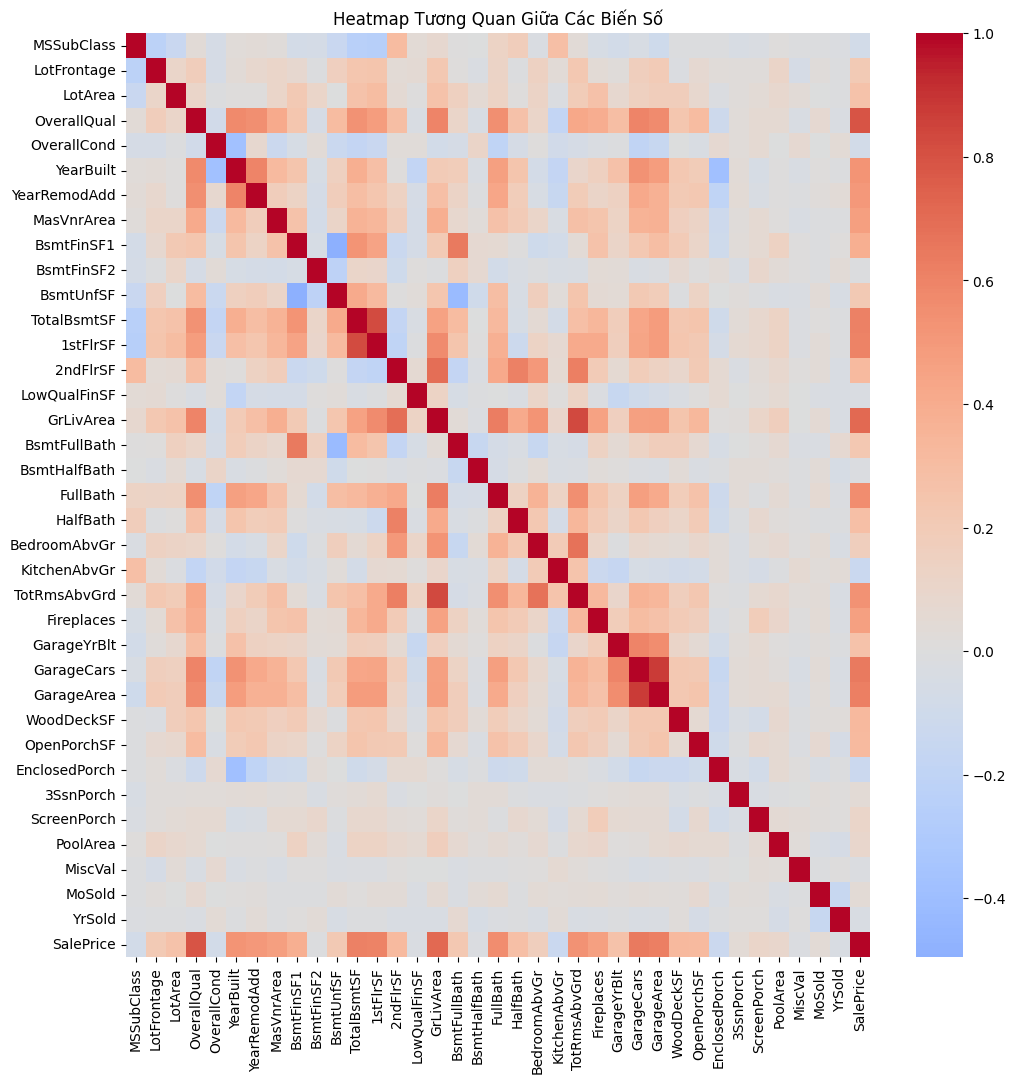

In [627]:
num_df = df.select_dtypes(include=['int64', 'float64'])

# Tính ma trận tương quan
corr = num_df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Heatmap Tương Quan Giữa Các Biến Số')
plt.savefig("graphs/fig_numerical_cor.png")
plt.show()

##### 2. Dữ liệu danh mục - Catagorical Datas

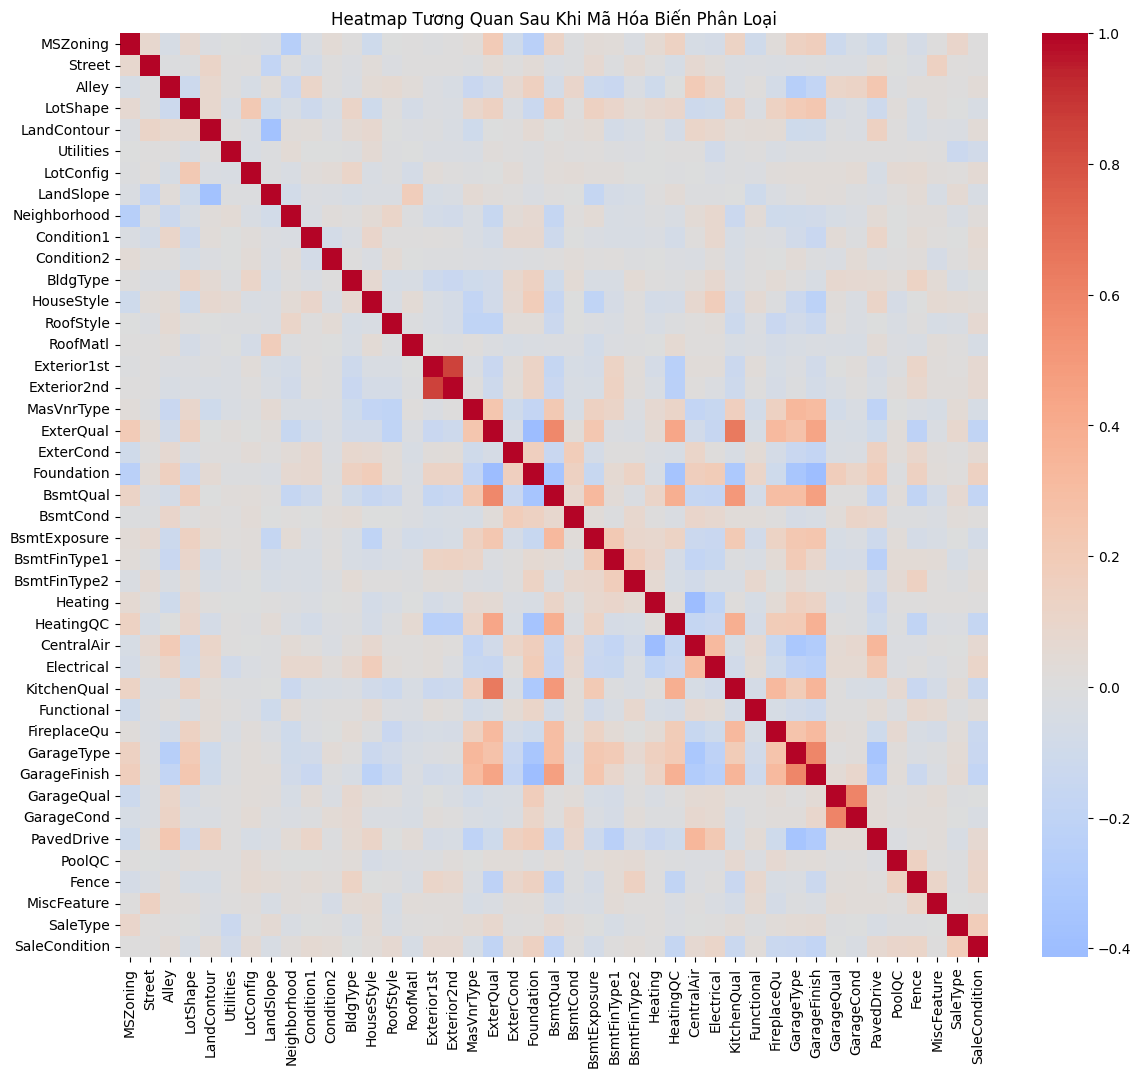

In [628]:
from sklearn.preprocessing import LabelEncoder

# Copy dataset
df_encoded = df.select_dtypes(include=['object'])

# Encode all categorical columns
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Compute correlation
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Heatmap Tương Quan Sau Khi Mã Hóa Biến Phân Loại')
plt.savefig("graphs/fig_catagorical_cor.png")
plt.show()


##### 3. Tất cả

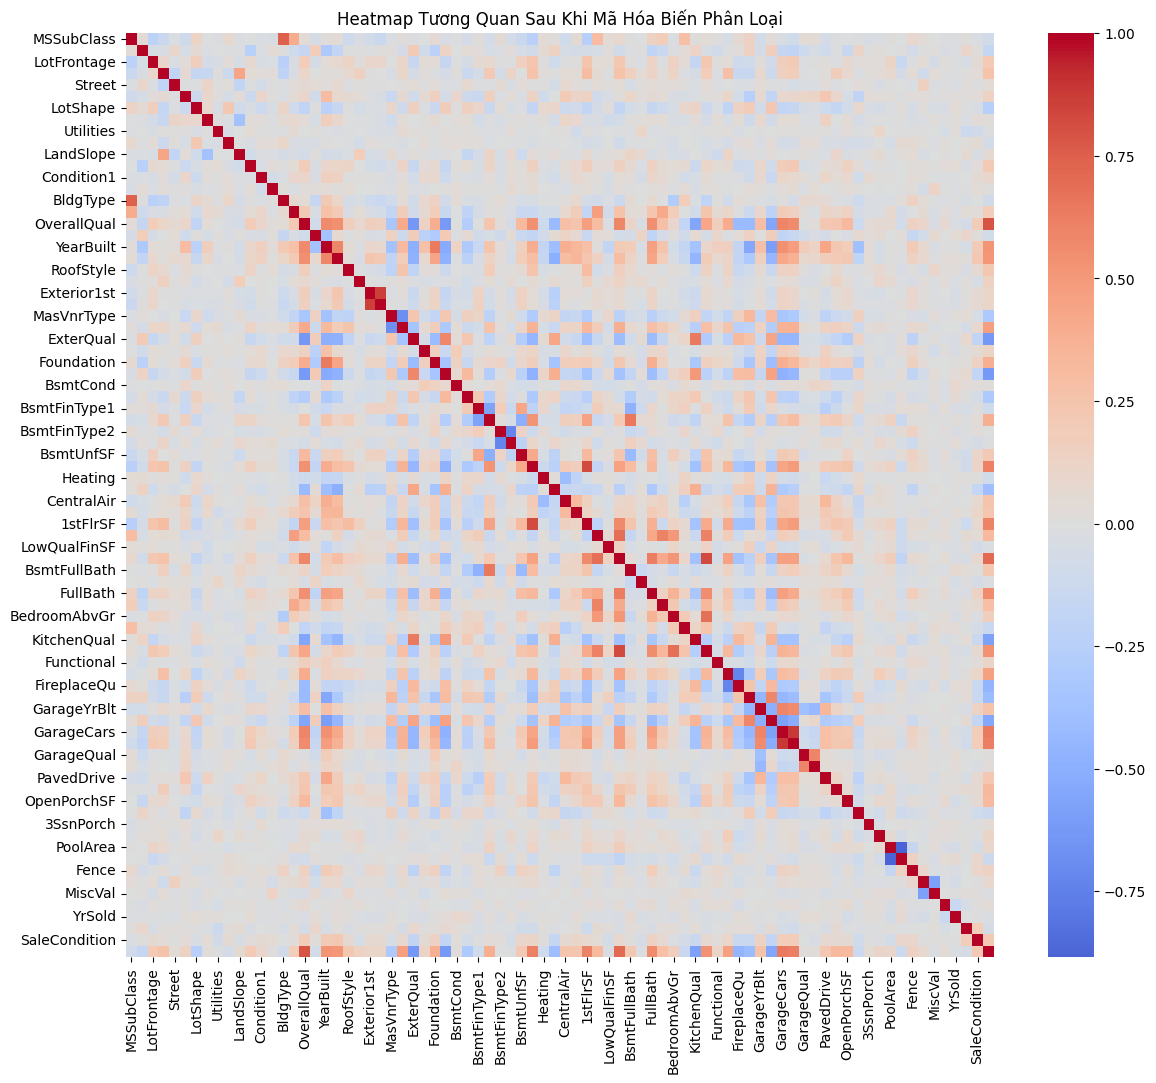

In [629]:
from sklearn.preprocessing import LabelEncoder

# Copy dataset
df_encoded = df.copy()

# Encode all categorical columns
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Compute correlation
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Heatmap Tương Quan Sau Khi Mã Hóa Biến Phân Loại')
plt.savefig("graphs/fig_cor.png")
plt.show()


**Phân tích Heatmap Tương Quan Giữa Các Biến Số**

**Biến tương quan mạnh với SalePrice**
- OverallQual: ảnh hưởng lớn nhất, chất lượng cao → giá cao  
- GrLivArea: diện tích sử dụng càng lớn → giá càng cao  
- GarageCars / GarageArea: gara rộng, chứa nhiều xe → giá cao  
- TotalBsmtSF, 1stFlrSF: diện tích tầng hầm và tầng 1 có tác động mạnh  
- YearBuilt, YearRemodAdd: nhà mới hoặc được sửa gần đây thường đắt hơn  

**Biến trùng lặp hoặc tương quan cao**
- GarageCars ↔ GarageArea  
- 1stFlrSF ↔ TotalBsmtSF ↔ GrLivArea  
- YearBuilt ↔ YearRemodAdd  
Nên loại bớt hoặc gộp khi huấn luyện mô hình.  

**Biến yếu hoặc ít ảnh hưởng**
PoolArea, MiscVal, 3SsnPorch, ScreenPorch, MoSold, YrSold → ít liên quan đến giá nhà.  

**Kết luận**
Các yếu tố về chất lượng, diện tích và độ mới của ngôi nhà là những đặc trưng quan trọng nhất ảnh hưởng đến SalePrice.
